In [1]:
# 라이브러리 설치

import pandas as pd 
import numpy as np 

#시각화
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# '-' 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 숫자 출력 형태 설정
pd.options.display.float_format = '{:.2f}'.format

# DataFrame 출력 범위 설정
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',999)

#경고무시
import sys
import warnings
warnings.filterwarnings('ignore')


In [2]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야함.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨짐.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [3]:
#확인하기
get_font_family()

'Malgun Gothic'

In [4]:
# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당.
a = get_font_family()
# 폰트설정
import matplotlib.pyplot as plt 
plt.rc("font", family = a)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)
# ggplot으로 그래프 스타일 설정 / 개인 자유
plt.style.use("ggplot")

================================================================

# 원티드DB 국민연금 사업장 데이터
## 원티드에서 실제로 사용 중인 데이터로, 여러 회사들과 회사들이 납부한 국민연금 보험료 정보 데이터

### - 데이터 정보
 - 회사 수 : 약 5000개
 - 월별 데이터 : 직원 수, 국민연금 보험료(인원 수에 대한 상한선_최대고지금액이 존재함)
 - 년 단위 데이터: 매출액(천원 단위)
### - EDA 목표
 - 위 데이터들의 분포(직원 수, 매출액, 보험료 등)
 - 몇몇 회사를 선택하여 데이터 흐름 살펴보기
 - 데이터 사이의 관계에 대해 유의미한 결론을 찾아봅시다.(아이디어 수립->EDA를 통해 관찰)

================================================================

In [66]:
df = pd.read_csv("company_nps_data.csv", encoding="cp949")
print(df.shape)
df.head()

(99801, 6)


,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151


In [8]:
df.isnull().sum()

회사ID        0
연매출액        0
년도          0
월           0
월별_연금보험료    0
월별_직원수      0
dtype: int64

In [9]:
df.describe()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
count,99801.00,99801.00,99801.00,99801.00,99801.00,99801.00
mean,276298.17,30535893.43,2016.97,6.71,9734079.21,37.62
std,133903.15,301664669.02,0.98,3.51,43472560.17,146.95
min,63.00,-7882176.00,2015.00,1.00,0.00,0.00
25%,165530.00,1409760.00,2016.00,4.00,1181160.00,6.00
50%,259149.00,3573585.00,2017.00,7.00,2332760.00,11.00
75%,382656.00,9582321.00,2018.00,10.00,5591860.00,24.00
max,5159723.00,11328779396.00,2019.00,12.00,978067260.00,3133.00


<AxesSubplot:>

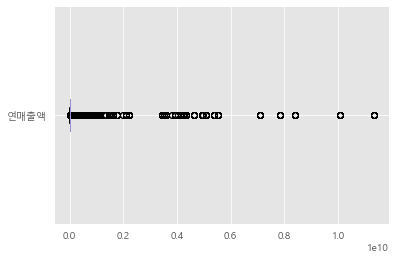

In [10]:
df[['연매출액']].plot.box(vert=False, grid=True)

In [16]:
corr = df[['연매출액', '월별_연금보험료', '월별_직원수']].corr()
corr

,연매출액,월별_연금보험료,월별_직원수
연매출액,1.00,0.73,0.64
월별_연금보험료,0.73,1.00,0.96
월별_직원수,0.64,0.96,1.00


In [17]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,연매출액,월별_연금보험료,월별_직원수
연매출액,1.00,0.73,0.64
월별_연금보험료,0.73,1.00,0.96
월별_직원수,0.64,0.96,1.00


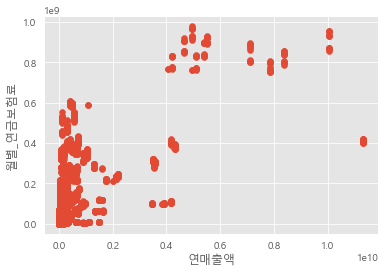

In [18]:
plt.scatter(df['연매출액'], df['월별_연금보험료'])
plt.xlabel('연매출액')
plt.ylabel('월별_연금보험료')
plt.savefig('./연매출액_월별_연금보험료_변화.png')
plt.show()

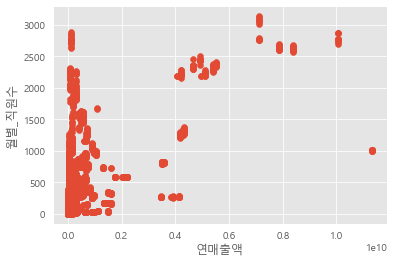

In [19]:
plt.scatter(df['연매출액'], df['월별_직원수'])
plt.xlabel('연매출액')
plt.ylabel('월별_직원수')
plt.savefig('./연매출액_월별_직원수_변화.png')
plt.show()

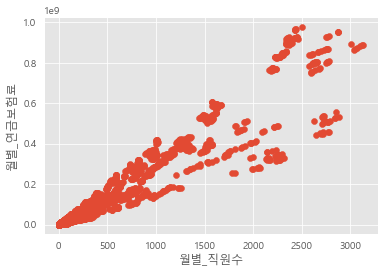

In [20]:
plt.scatter(df['월별_직원수'], df['월별_연금보험료'])
plt.xlabel('월별_직원수')
plt.ylabel('월별_연금보험료')
plt.savefig('./월별_직원수_월별_연금보험료_변화.png')
plt.show()

<AxesSubplot:title={'center':'월별_직원수 vs 월별_연금보험료'}, xlabel='월별_직원수', ylabel='월별_연금보험료'>

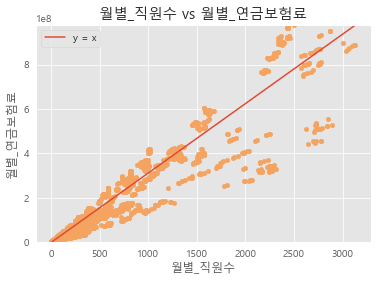

In [21]:
max_emp = df['월별_직원수'].max()

df_helper_line = pd.DataFrame({
    '월별_직원수' : [0,max_emp],
    'y = x' : [0,978067260.00]
})

ax = df.plot.scatter(x = '월별_직원수', y = '월별_연금보험료',
                       color = 'sandybrown', ylim = (0,978067260.00),
                       title = '월별_직원수 vs 월별_연금보험료')
df_helper_line.plot.line(x = '월별_직원수', y = 'y = x', ax = ax) #overlay plots


In [22]:
# 회사ID 개수 확인
len(df['회사ID'].unique())

5000

In [67]:
# 시계열 분석을 위한 '년도'+'월' =' 날짜' 변수 생성
df['날짜'] = pd.to_datetime(df['년도'].astype(str) + df['월'].astype(str), format='%Y%m').dt.strftime('%Y%m')
df.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,날짜
0,233757,41688077,2018,7,8912380,36,201807
1,123464,1760695,2018,3,942380,5,201803
2,342124,3221341,2018,7,781180,4,201807
3,386420,4815584,2015,11,3795900,14,201511
4,129243,9799736,2018,10,40724680,151,201810


In [27]:
# index0 회사ID만 추출하여 추세 확인 
df_233757 = df.loc[(df["회사ID"]==233757),:].sort_values(by=['날짜'],axis=0)
print(df_233757.shape)
df_233757

(38, 7)


,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,날짜
99710,233757,9835158,2015,11,2043240,10,201511
89694,233757,9835158,2015,12,2691240,15,201512
90070,233757,30229862,2016,1,2710780,15,201601
9201,233757,30229862,2016,2,2311460,13,201602
55588,233757,30229862,2016,3,2311460,13,201603
31365,233757,30229862,2016,4,3691160,17,201604
8183,233757,30229862,2016,5,3753260,19,201605
11312,233757,30229862,2016,6,4663160,23,201606
93788,233757,30229862,2016,7,5065980,24,201607
95524,233757,30229862,2016,8,5317980,25,201608


<AxesSubplot:title={'center':'233757 매출액과 직원수 변화'}, xlabel='날짜', ylabel='연매출액'>

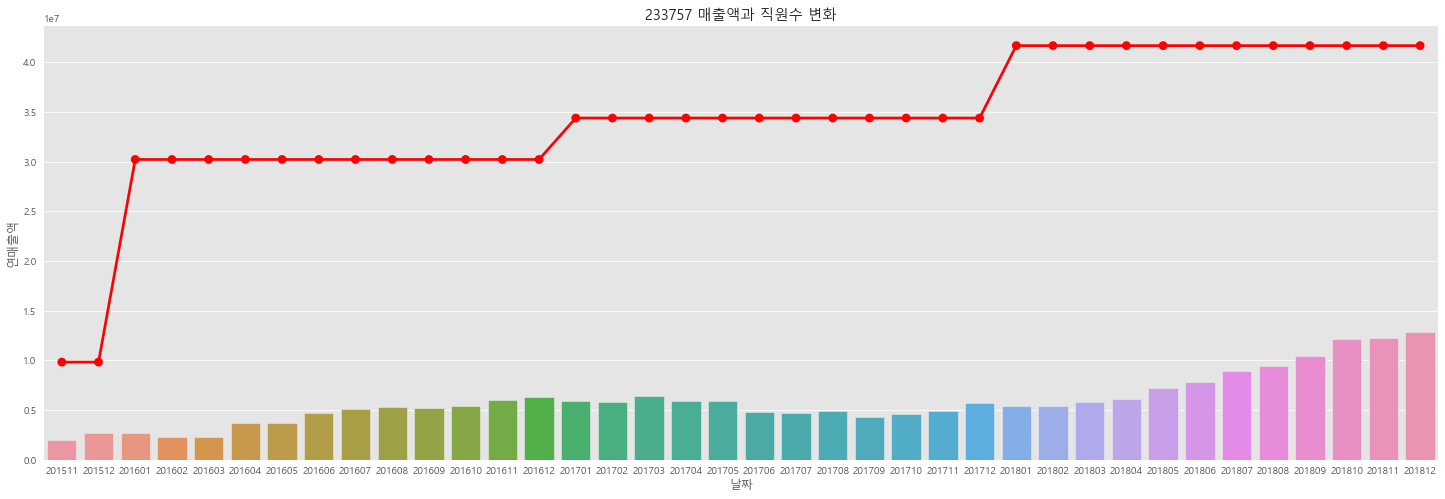

In [28]:
# 날짜에 따른 매출액과 직원수 변화 그래프
plt.figure(figsize=[25,8])
plt.title("233757 매출액과 직원수 변화")
plt.rc('axes', labelsize=20)
plt.rc('axes', titlesize=20)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=20)

ax = sns.barplot(x="날짜", y="월별_연금보험료", data=df_233757)
sns.pointplot(data=df_233757, x='날짜', y='연매출액',color='r')

### 회사 선정
 - 연매출액 평균 이상 top5
 - 월별_연금보험료 평균 이상 top5
 - 월별_직원수 평균 이상 top5

In [70]:
df_매출_group = df.groupby(['회사ID','년도']).mean()

In [71]:
df_매출_group

,,연매출액,월,월별_연금보험료,월별_직원수
회사ID,년도,,,,
63,2018,11328779396.00,6.50,410128228.33,1007.17
95,2018,656947437.00,6.50,214837843.33,541.00
102,2018,742658938.00,8.50,173769522.50,752.12
295,2018,83776697.00,8.50,77312035.00,259.50
414,2018,19732769.00,6.50,77590193.33,247.58
...,...,...,...,...,...
2400284,2018,1263406.00,7.00,1055497.14,4.71
2437574,2018,214016.00,5.00,636740.00,3.00
2693684,2019,238076.00,9.50,438120.00,3.00


In [61]:
# '연매출액' 평균인 30,535,893.43 이상 기업 추출(연매출액 )
df_매출 = df.loc[(df["연매출액"]>30535893.43),:]['회사ID'].sort_values(by=['날짜'],axis=0,ascending=False)
print(df_매출.shape)
df_매출

TypeError: sort_values() got an unexpected keyword argument 'by'

In [53]:
# 연매출액 상위 5개 기업 ID 확인
print(len(df_매출['회사ID'].unique()))
df_매출['회사ID'].unique()

363


array([    63, 419945, 227415, 227414, 419977, 294649, 419998, 126831,
       381180, 420008, 297874, 126516, 126606, 294620, 294367, 294530,
          102, 126538, 426429, 146654, 630190,     95, 127090, 126814,
       420046, 126521, 126674, 403351, 130729, 440030, 127511, 126664,
       382850, 127060, 439902, 126772, 126641, 130387, 232757, 294337,
       547586, 580356, 231173,   5452, 127202, 297327, 420092, 130322,
          597, 127366, 127180, 127669, 126983, 128896, 294790,   8835,
        40860, 403434, 294387, 381344, 420165, 231384, 128539, 420076,
       403462, 403359, 126802, 231080, 433492, 420082, 510329, 234236,
       403504, 428817, 439986, 130577, 294964, 231703, 127065, 403522,
       489849, 128440, 260890, 130386, 154500, 433756, 295805,   2842,
       567650, 469458, 128174, 420237, 129828, 295618, 231606, 469677,
       430504, 296476, 128638, 128485, 133951, 301484, 403470, 297441,
       429453, 429378, 420304, 297496, 129370, 313888, 149366,   5202,
      

## '연매출액' 평균 이상 363개 기업 중 상위 5개 기업
#### 63, 419945, 227415, 227414, 419977,

In [54]:
df_매출_63 = df.loc[(df["회사ID"]==63),:].sort_values(by=['날짜'],axis=0)
print(df_매출_63.shape)
df_매출_63

(12, 7)


,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,날짜
33039,63,11328779396,2018,1,403119840,1006,201801
74251,63,11328779396,2018,2,406770960,1018,201802
80947,63,11328779396,2018,3,404826240,1013,201803
80770,63,11328779396,2018,4,404211800,1012,201804
28110,63,11328779396,2018,5,400339640,1002,201805
6449,63,11328779396,2018,6,401083100,1011,201806
23302,63,11328779396,2018,7,418169080,1009,201807
52606,63,11328779396,2018,8,418292620,1011,201808
79358,63,11328779396,2018,9,416186660,999,201809
23648,63,11328779396,2018,10,414503020,996,201810


<AxesSubplot:title={'center':'63 연매출액 변화'}, xlabel='년도', ylabel='연매출액'>

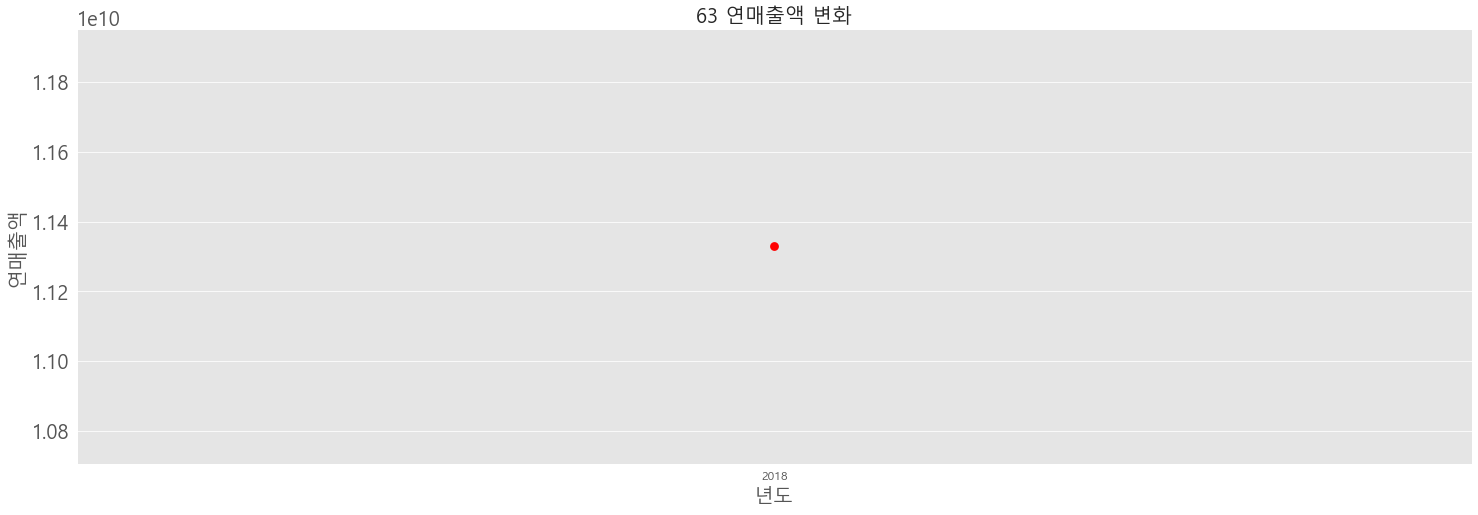

In [58]:
# 날짜에 따른 연매출액 변화 그래프
plt.figure(figsize=[25,8])
plt.title("63 연매출액 변화")
plt.rc('axes', labelsize=20)
plt.rc('axes', titlesize=20)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=20)

sns.pointplot(data=df_매출_63, x='년도', y='연매출액',color='r')

In [ ]:
df_매출_sum = df.groupby('회사ID')['연매출액'].

In [69]:
df_매출 = df.loc[(df["연매출액"]>30535893.43)].groupby('회사ID')['연매출액'].mean().reset_index()
df_매출

,회사ID,연매출액
0,63,11328779396.00
1,95,656947437.00
2,102,742658938.00
3,295,83776697.00
4,597,208141595.00
5,786,65514573.00
6,917,42843708.00
7,1125,53713870.00
8,2031,34604403.00
9,2842,113877008.00


In [62]:
df['연매출액'].mean()

30535893.434244145

===================================================================================

In [75]:
print(df.dtypes)

회사ID         int64
연매출액         int64
년도           int64
월            int64
월별_연금보험료     int64
월별_직원수       int64
날짜          object
dtype: object


In [76]:
df[['회사ID','년도','월']] = df[['회사ID','년도','월']].astype(str)
print(df.dtypes)

회사ID        object
연매출액         int64
년도          object
월           object
월별_연금보험료     int64
월별_직원수       int64
날짜          object
dtype: object


In [77]:
df_group_mean = df.groupby(['회사ID'], as_index=False).mean()
df_group_mean

,회사ID,연매출액,월별_연금보험료,월별_직원수
0,101365,2047762.00,559865.00,3.12
1,101711,49945076.00,854665.71,3.14
2,101742,50356.00,313868.57,3.00
3,101833,320104.00,1086753.33,3.89
4,101956,514658.00,736200.00,3.00
...,...,...,...,...
4995,9734,5724742.00,4598560.00,22.83
4996,9862,10294662.00,4698648.33,23.67
4997,990805,598948.00,278215.00,3.83
4998,99338,1504905.00,818641.82,3.18


In [81]:
df_매출_mean = df_group_mean[(df_group_mean["연매출액"]>30535893.43)].sort_values(by=['연매출액'],axis=0, ascending=False)
print(df_매출_mean.shape)
df_매출_mean

(310, 4)


,회사ID,연매출액,월별_연금보험료,월별_직원수
4859,63,11328779396.00,410128228.33,1007.17
3820,419945,8353127318.00,838814933.33,2744.48
1537,227415,5314558497.37,852418842.63,2298.42
1536,227414,4567377417.42,869685058.42,2324.05
3821,419977,4252085666.67,391094838.33,1285.53
2456,294649,3836737131.74,102939802.11,270.47
3822,419998,3538392528.67,302617804.44,812.44
144,126831,2019423435.89,227684442.63,584.08
3823,420008,1466671121.67,183154413.33,489.64
3399,381180,1459656556.74,63779015.26,170.61


### 연매출액 전체 평균인 30,535,893.43 이상인 기업 310개 중 상위 3개 기업 추출하여 추세 확인
 - 63
 - 419945
 - 227415
 - 227414
 - 419977
 - 294649

63은 2018년도 1개년도 밖에 없으므로 분석 제외

=================================================================================

In [83]:
df_보험료_mean = df_group_mean[(df_group_mean["월별_연금보험료"]>9734079.21)].sort_values(by=['월별_연금보험료'],axis=0, ascending=False)
print(df_보험료_mean.shape)
df_보험료_mean

(542, 4)


,회사ID,연매출액,월별_연금보험료,월별_직원수
1536,227414,4567377417.42,869685058.42,2324.05
1537,227415,5314558497.37,852418842.63,2298.42
3820,419945,8353127318.00,838814933.33,2744.48
134,126516,483908366.46,554900657.69,1511.54
135,126521,561140126.16,532062027.89,1526.95
4309,469458,112487971.68,500674027.20,2747.44
3983,439902,309441718.00,489029400.00,1816.50
4859,63,11328779396.00,410128228.33,1007.17
136,126538,698283164.26,396866791.05,1256.47
3821,419977,4252085666.67,391094838.33,1285.53


### 월별_연금보험료 전체 평균이 9,734,079.21 이상인 기업 542개 중 상위 3~5개 기업 추출하여 추세확인
 - 227414
 - 227415
 - 419945
 - 126516
 - 126521

각 사업장의 기준소득월액의 합이 기준소득월액의 상한액(5,030,000원, 2020.7.~2021.6.)을 초과하는 경우에는 각 사업장의 기준 소득월액이 그 합산된 소득월액에서 차지하는 비율을 최고금액의 기준소득월액에 곱하여 계산된 금액을 기준으로 각 사업장의 기준소득월액을 산정합니다.
출처 : https://blog.naver.com/cnphr/222315310121

==============================================================

In [84]:
df_직원_mean = df_group_mean[(df_group_mean["월별_직원수"]>37.62)].sort_values(by=['월별_직원수'],axis=0, ascending=False)
print(df_직원_mean.shape)
df_직원_mean

(607, 4)


,회사ID,연매출액,월별_연금보험료,월별_직원수
4309,469458,112487971.68,500674027.20,2747.44
3820,419945,8353127318.00,838814933.33,2744.48
1536,227414,4567377417.42,869685058.42,2324.05
1537,227415,5314558497.37,852418842.63,2298.42
4310,469473,69411515.26,322523475.26,2163.26
3983,439902,309441718.00,489029400.00,1816.50
2451,294337,203081831.53,357223875.26,1736.53
135,126521,561140126.16,532062027.89,1526.95
4695,547586,283610660.00,388365113.33,1513.25
134,126516,483908366.46,554900657.69,1511.54


### 월별 직원수 전체 평균이 37.62명 이상인 기업 607개 중 3~5개 기업 추출하여 추세확인
 - 469458
 - 419945
 - 227414
 - 227415
 - 469473

=================================================================

In [ ]:
연평균 성장률(CAGR) 공식
= (최종연도값/최초연도값)^(1/연도간격)-1
출처 : https://m.blog.naver.com/iwannado19/222257578372

In [85]:
df_group_count = df.groupby(['회사ID','년도'], as_index=False).count()
df_group_count

,회사ID,년도,연매출액,월,월별_연금보험료,월별_직원수,날짜
0,101365,2018,8,8,8,8,8
1,101711,2018,7,7,7,7,7
2,101742,2018,7,7,7,7,7
3,101833,2018,9,9,9,9,9
4,101956,2018,10,10,10,10,10
...,...,...,...,...,...,...,...
10106,9734,2018,12,12,12,12,12
10107,9862,2018,12,12,12,12,12
10108,990805,2018,12,12,12,12,12
10109,99338,2018,11,11,11,11,11
